In [1]:
import os
import glob
import pandas as pd

import tools
from transformator import (
    relative_concentration, get_accepted_maximum_value,
    get_all_relative_concentration)
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = tools.get_all_data('row_data', 'txt')

data_pd = data[data['status'] == 'PD']
data_led = data[data['status'] == 'LED']

In [3]:
data.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


# Дефект Низкотемпературного перегрева

In [4]:
data_lto = data[data['status'] == 'LTO']
data_normal = data[data['status'] == 'norm']
data_lto.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


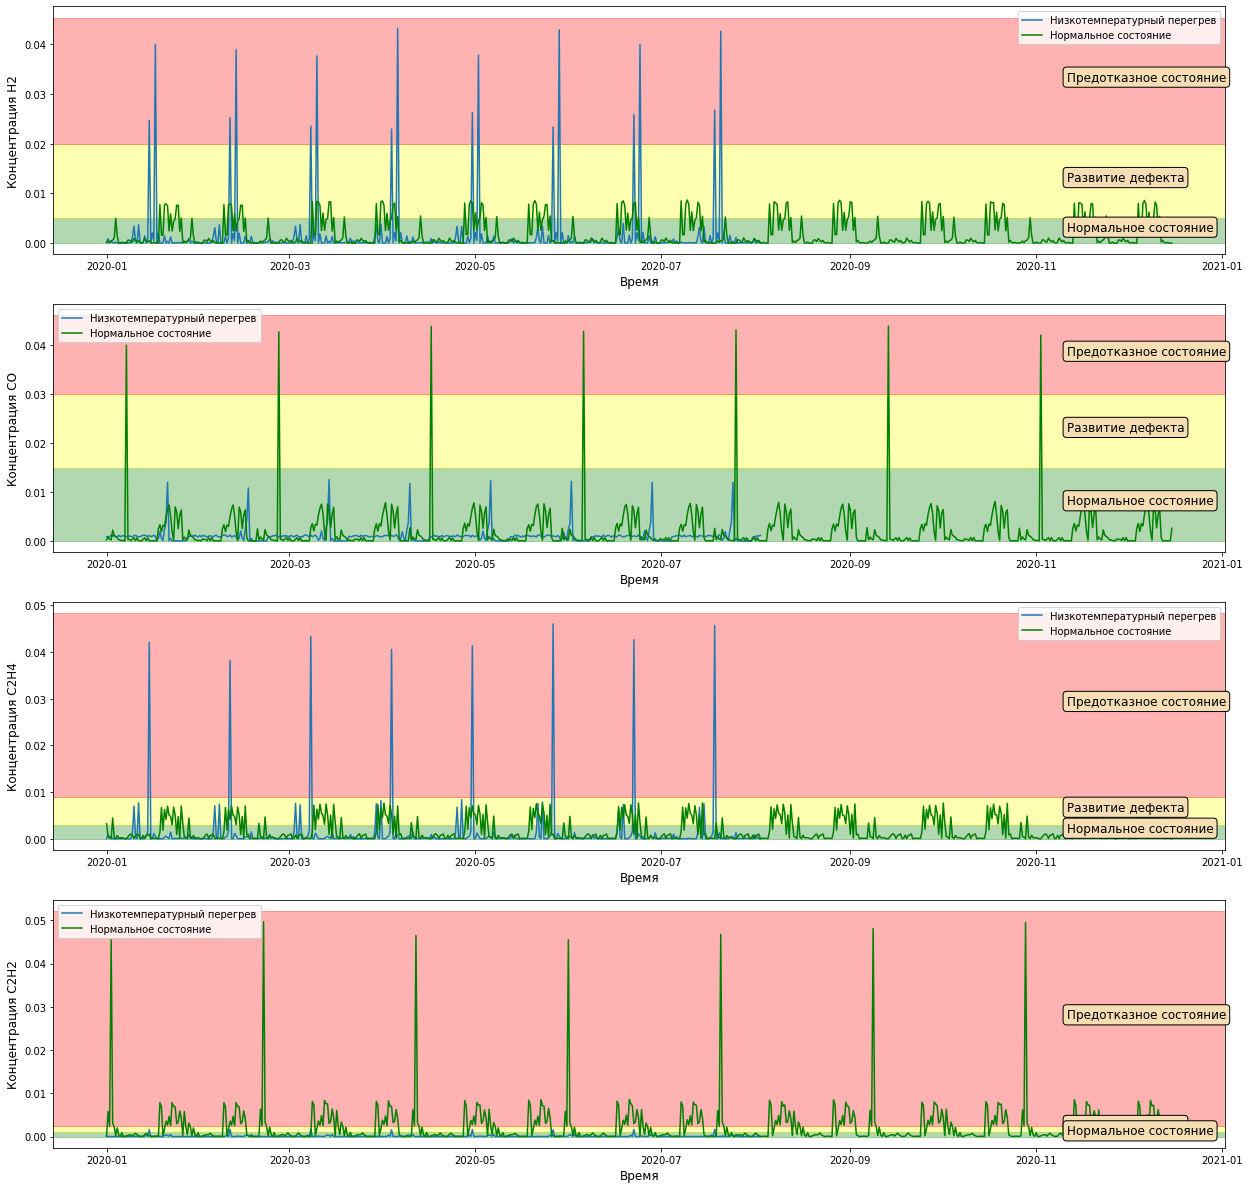

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)

for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    
    accepted_level = get_accepted_maximum_value(gas, 0, '35kW')[0]
    maximum_level = get_accepted_maximum_value(gas, 0, '35kW')[1]
    
    max_axhspan_level = max(data_lto[gas].max(), data_normal[gas].max()) * 1.05 
    
    max_text_level = (max_axhspan_level - maximum_level) / 2 + maximum_level
    accepted_text_level = (maximum_level - accepted_level) / 2 + accepted_level
    normal_text_level = accepted_level / 2
    text_egle = round(len(data_normal['datetime']) * 0.90) 
    # Графики
    ax[i].plot(data_lto['datetime'], data_lto[gas], label='Низкотемпературный перегрев')
    ax[i].plot(data_normal['datetime'], data_normal[gas], label='Нормальное состояние', color='green') 
    # Зоны
    ax[i].axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
    ax[i].axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
    ax[i].axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
    # Текст
    ax[i].text(data_normal['datetime'].iloc[text_egle], max_text_level, "Предотказное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], accepted_text_level, "Развитие дефекта", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], normal_text_level, "Нормальное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].set_xlabel("Время", fontsize=12)
    ax[i].set_ylabel(f'Концентрация {gas}', fontsize=12)
    ax[i].legend()

plt.show()

In [6]:
df_relative_conc = get_all_relative_concentration(data_lto[['H2', 'CO', 'C2H4', 'C2H2']])
df_relative_conc.head()

,H2,CO,C2H4,C2H2
0,0.0448,0.057457,0.000000,0.000
1,0.1800,0.056563,0.300000,0.022
2,0.0000,0.060102,0.015000,0.000
3,0.0940,0.076867,0.149333,0.000
4,0.0130,0.066426,0.001667,0.000


In [7]:
import numpy as np

26 days 12:00:00
26 days 12:00:00
26 days 12:00:00
26 days 12:00:00
50 days 00:00:00
50 days 00:00:00
50 days 00:00:00
50 days 00:00:00


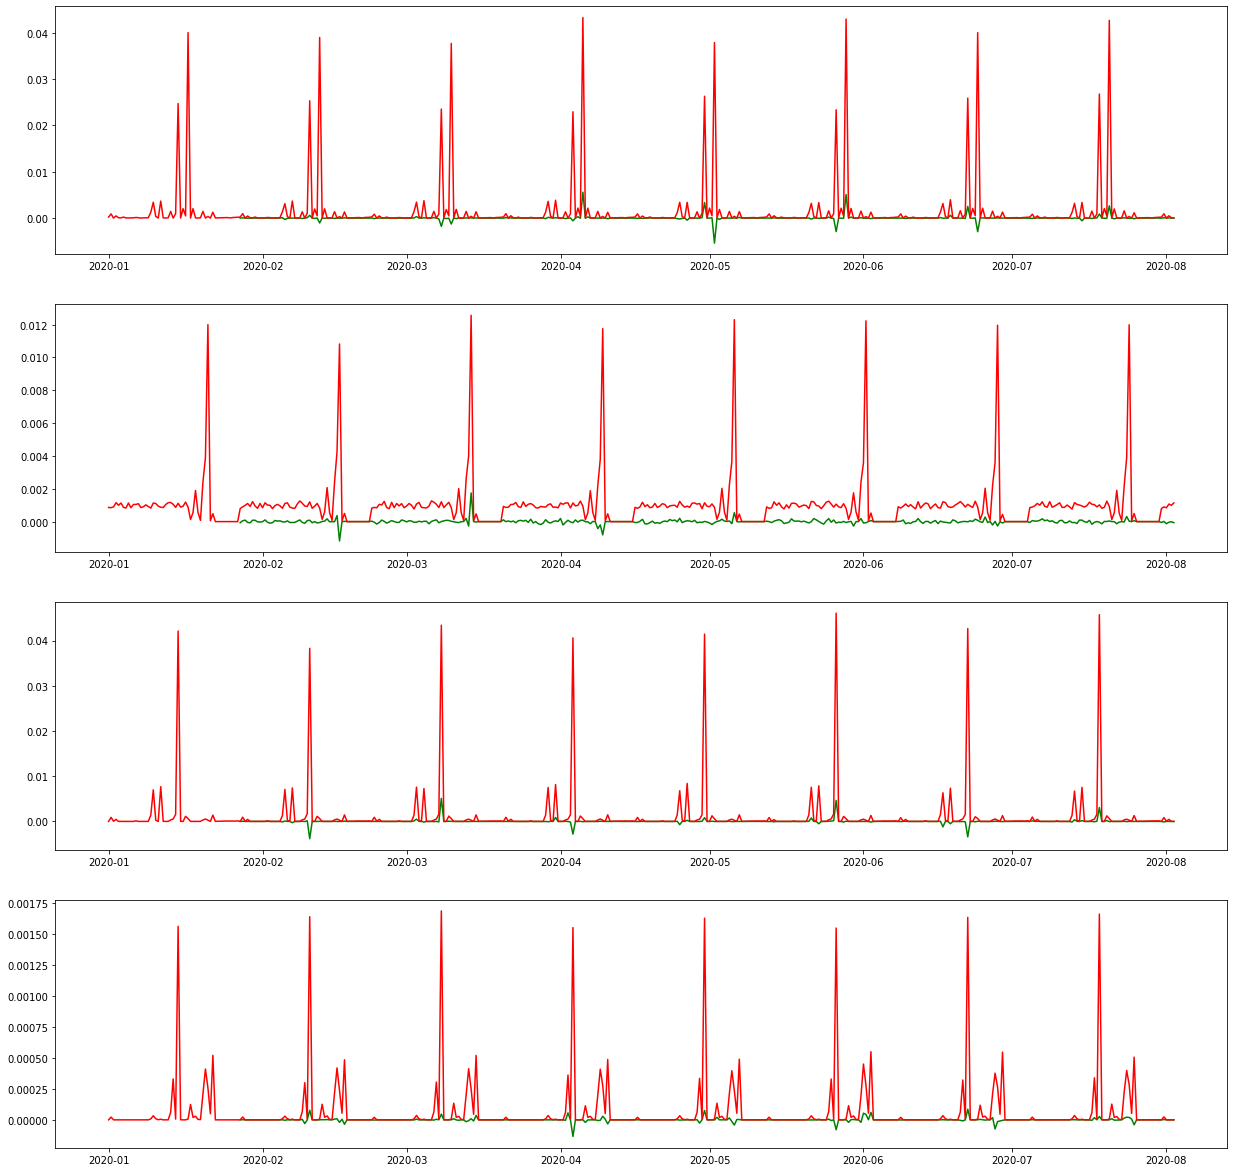

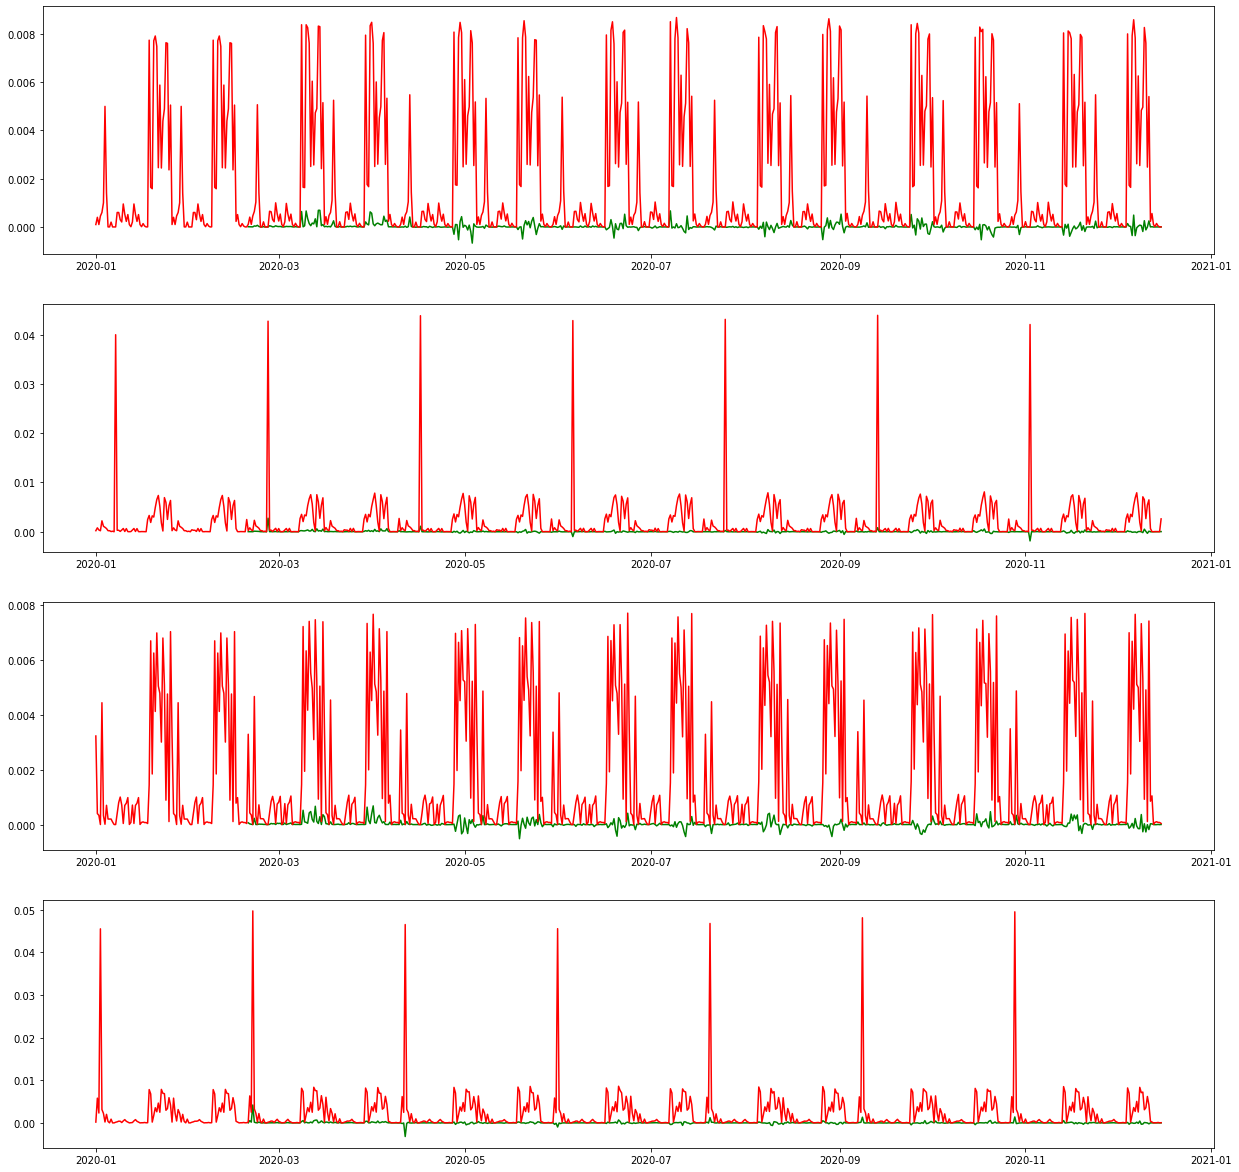

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)

for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    corr=np.correlate(data_lto[gas],data_lto[gas],'same')
    delay_1,delay_2 = data_lto['datetime'].index[np.argsort(-corr)[0]],data_lto['datetime'].index[np.argsort(-corr)[1]]
    time_shift=np.abs(data_lto['datetime'][delay_2]-data_lto['datetime'][delay_1])
    print(time_shift)
    findlay=np.abs(delay_2-delay_1)
    ax[i].plot(data_lto['datetime'], data_lto[gas].diff(findlay), label='Нормальное состояние', color='green')
#     ax[i].plot(data_normal['datetime'], np.correlate(data_normal[gas],data_normal[gas],'same'), label='Нормальное состояние', color='blue')
    ax[i].plot(data_lto['datetime'], data_lto[gas], label='Нормальное состояние', color='red')\
    
    

fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    corr=np.correlate(data_normal[gas],data_normal[gas],'same')
    delay_1,delay_2 = data_normal['datetime'].index[np.argsort(-corr)[0]],data_normal['datetime'].index[np.argsort(-corr)[1]]
    time_shift=np.abs(data_normal['datetime'][delay_2]-data_normal['datetime'][delay_1])
    print(time_shift)
    findlay=np.abs(delay_2-delay_1)
    ax[i].plot(data_normal['datetime'], data_normal[gas].diff(findlay), label='Нормальное состояние', color='green')
#     ax[i].plot(data_normal['datetime'], np.correlate(data_normal[gas],data_normal[gas],'same'), label='Нормальное состояние', color='blue')
    ax[i].plot(data_normal['datetime'], data_normal[gas], label='Нормальное состояние', color='red')

XGBOOST

In [1]:
import xgboost

In [ ]:
data_normal.reset_index(inplace=True)
data_normal = data_normal.set_index('datetime')

In [20]:
print(model_res)

{'H2': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7f14ff1b9970>, 'CO': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7f14ff4d55b0>, 'C2H4': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7f15000938e0>, 'C2H2': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7f14fffdba00>}


----------------------------------------------------
GAS H2


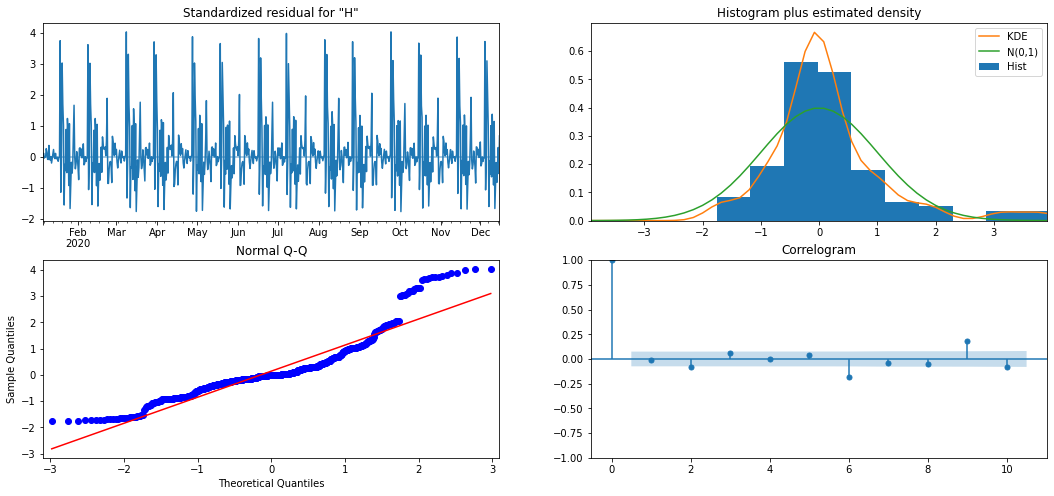

----------------------------------------------------
GAS CO


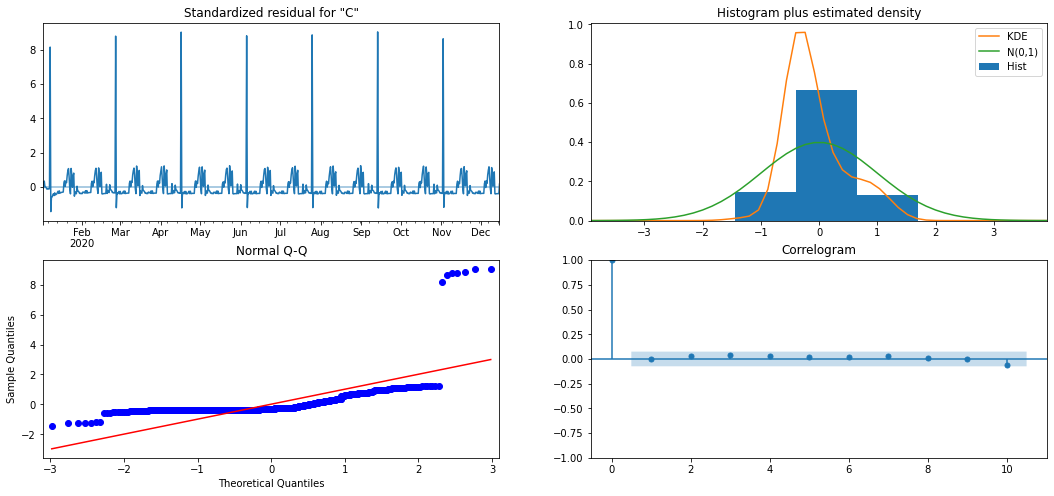

----------------------------------------------------
GAS C2H4


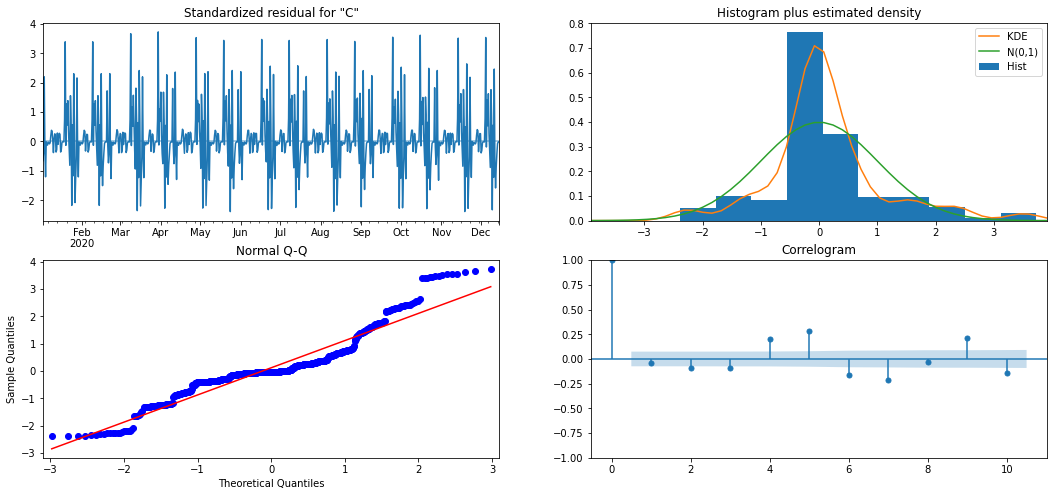

----------------------------------------------------
GAS C2H2


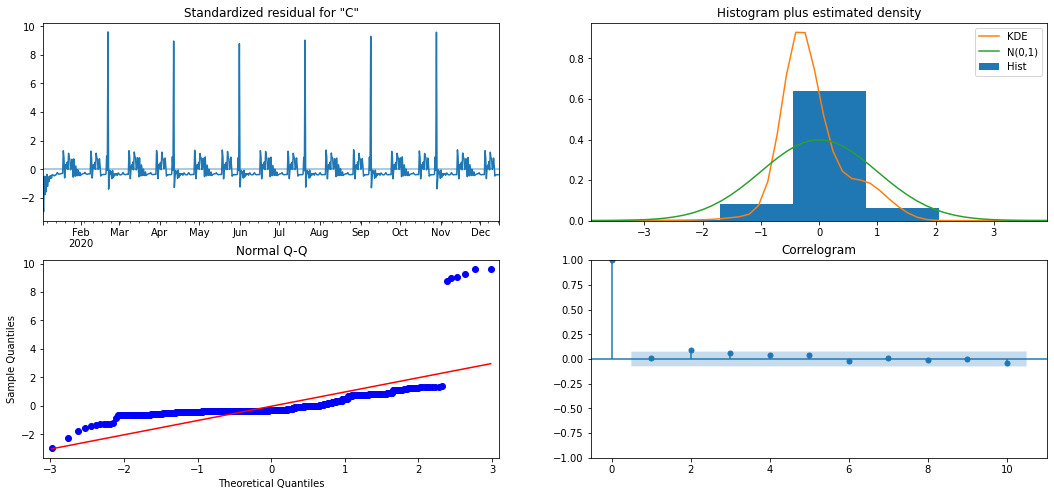

In [21]:
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    model_res[gas].plot_diagnostics(figsize=(18, 8))
    model_forecast=model_res[gas]
    plt.show()

----------------------------------------------------
GAS H2


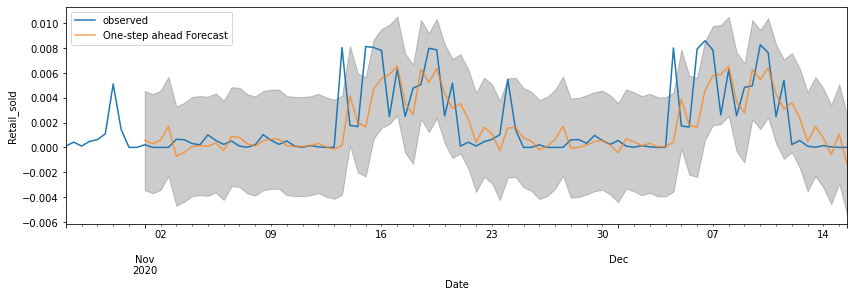

The Mean Squared Error is 4.3485e-06
The Root Mean Squared Error is 0.0020852954


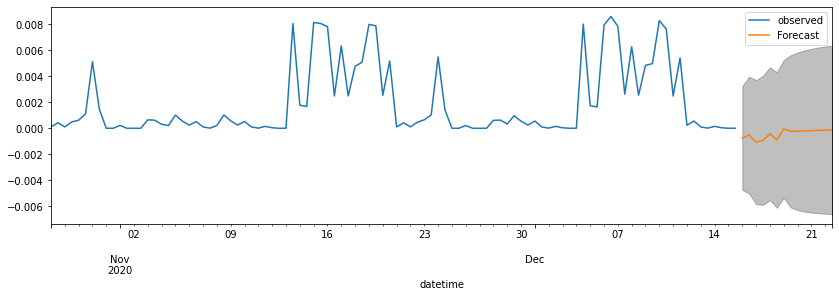

----------------------------------------------------
GAS CO


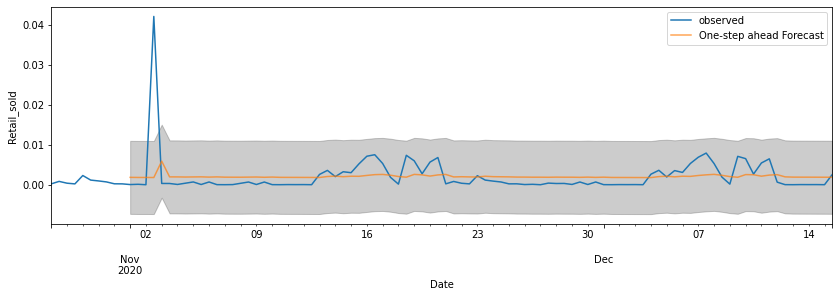

The Mean Squared Error is 2.34103e-05
The Root Mean Squared Error is 0.0048384168


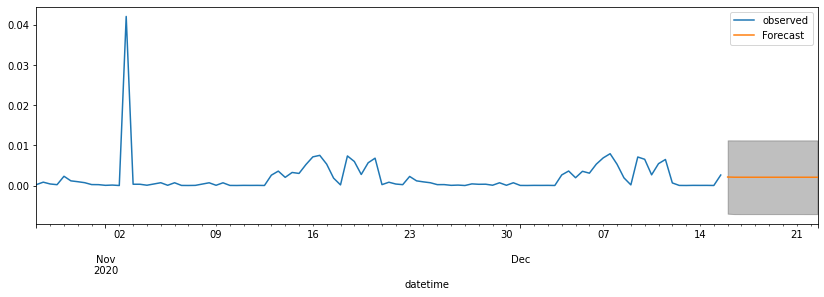

----------------------------------------------------
GAS C2H4


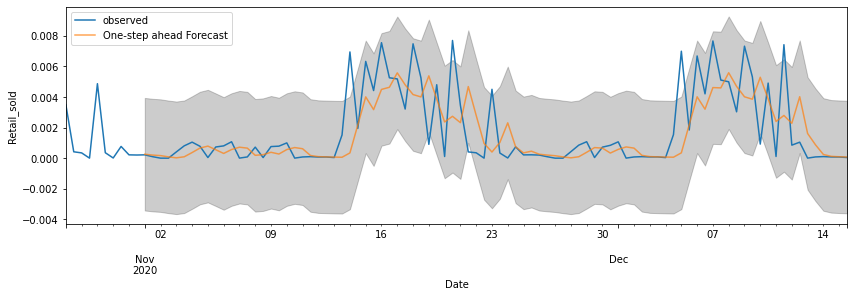

The Mean Squared Error is 3.6161e-06
The Root Mean Squared Error is 0.001901606


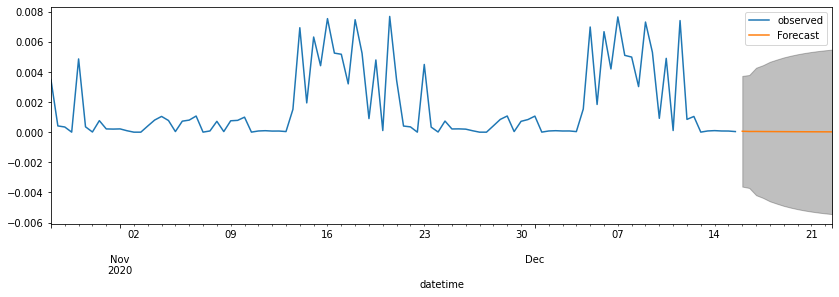

----------------------------------------------------
GAS C2H2


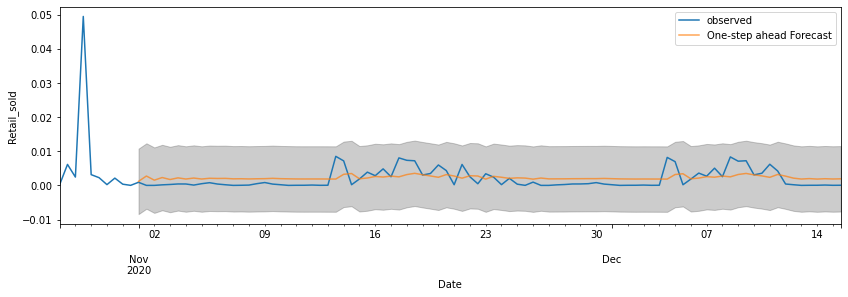

The Mean Squared Error is 5.6407e-06
The Root Mean Squared Error is 0.0023750134


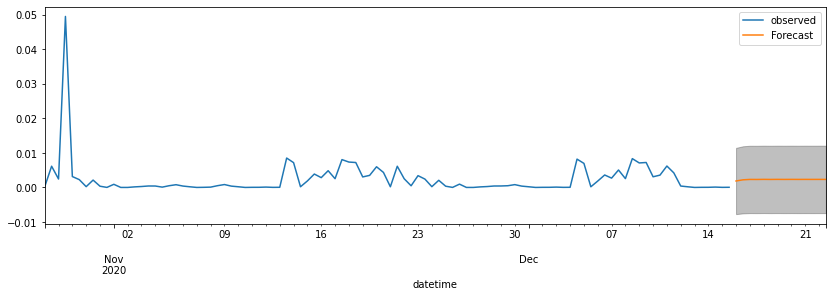

In [22]:
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    print('----------------------------------------------------\nGAS %s'%gas)
    plt.figure()
    pred = model_res[gas].get_prediction(start=pd.to_datetime('2020-11-01'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = data_normal[gas][600:].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Retail_sold')
    plt.legend()
    plt.show()
    y_forecasted = pred.predicted_mean
    y_truth = data_normal[gas][600:]
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error is {}'.format(round(mse, 10)))
    print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 10)))
    plt.figure()
    pred_uc = model_res[gas].get_forecast(steps=14)
    pred_ci = pred_uc.conf_int()
    ax = y_truth.plot(label='observed', figsize=(14, 4))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    plt.legend()
    plt.show()